# Categorical Encoding and Scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Categorical encoding
- One-hot encoding
- Label Encoding
- custom binary encoding

In [2]:
# One-hot encoding (by get_dummies)
n_samples = 10
height = 3 * np.random.randn(n_samples).round() + 170
nationality = np.random.randint(0, 3, n_samples)
nationality = pd.Series(nationality).map({0:'Korea',
                                          1: 'Japan',
                                          2: 'China'})
print(height)
print(nationality)

[167. 167. 167. 173. 173. 173. 170. 167. 170. 170.]
0    Korea
1    Korea
2    Japan
3    Japan
4    Japan
5    China
6    Korea
7    Korea
8    Korea
9    Japan
dtype: object


In [3]:
df = pd.DataFrame(list(zip(height, nationality)), columns=['height', 'nationality'])
df

,height,nationality
0,167.0,Korea
1,167.0,Korea
2,167.0,Japan
3,173.0,Japan
4,173.0,Japan
5,173.0,China
6,170.0,Korea
7,167.0,Korea
8,170.0,Korea
9,170.0,Japan


In [4]:
new_df = pd.get_dummies(df, columns=['nationality'], prefix='nat')
new_df

,height,nat_China,nat_Japan,nat_Korea
0,167.0,0,0,1
1,167.0,0,0,1
2,167.0,0,1,0
3,173.0,0,1,0
4,173.0,0,1,0
5,173.0,1,0,0
6,170.0,0,0,1
7,167.0,0,0,1
8,170.0,0,0,1
9,170.0,0,1,0


In [5]:
# OneHotEncoding using sklearn function OneHotEncoder()
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
ohe = OneHotEncoder()
encoded = ohe.fit_transform(df.nationality.values.reshape(-1,1)) # matrix (N,1) 형식으로 전달해야함
encoded.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [7]:
ohe.categories_, ohe.get_feature_names()

([array(['China', 'Japan', 'Korea'], dtype=object)],
 array(['x0_China', 'x0_Japan', 'x0_Korea'], dtype=object))

In [8]:
col = ['nat_' + str(ohe.categories_[0][i]) for i in range(len(ohe.categories_[0]))]
col

['nat_China', 'nat_Japan', 'nat_Korea']

In [9]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=col)
encoded_df

,nat_China,nat_Japan,nat_Korea
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [10]:
new_df = pd.concat([df, encoded_df], axis=1)
new_df

,height,nationality,nat_China,nat_Japan,nat_Korea
0,167.0,Korea,0.0,0.0,1.0
1,167.0,Korea,0.0,0.0,1.0
2,167.0,Japan,0.0,1.0,0.0
3,173.0,Japan,0.0,1.0,0.0
4,173.0,Japan,0.0,1.0,0.0
5,173.0,China,1.0,0.0,0.0
6,170.0,Korea,0.0,0.0,1.0
7,167.0,Korea,0.0,0.0,1.0
8,170.0,Korea,0.0,0.0,1.0
9,170.0,Japan,0.0,1.0,0.0


In [11]:
# nationality 지우면 끝
new_df.drop('nationality', axis=1, inplace=True)
new_df

,height,nat_China,nat_Japan,nat_Korea
0,167.0,0.0,0.0,1.0
1,167.0,0.0,0.0,1.0
2,167.0,0.0,1.0,0.0
3,173.0,0.0,1.0,0.0
4,173.0,0.0,1.0,0.0
5,173.0,1.0,0.0,0.0
6,170.0,0.0,0.0,1.0
7,167.0,0.0,0.0,1.0
8,170.0,0.0,0.0,1.0
9,170.0,0.0,1.0,0.0


In [12]:
# Label Encoding : only a single column (originally for converting a target variable)
df_org = df.copy()
le = LabelEncoder() # Orinal
df['nat_label_encoded'] = le.fit_transform(df.nationality)
print(le.classes_)
df

['China' 'Japan' 'Korea']


,height,nationality,nat_label_encoded
0,167.0,Korea,2
1,167.0,Korea,2
2,167.0,Japan,1
3,173.0,Japan,1
4,173.0,Japan,1
5,173.0,China,0
6,170.0,Korea,2
7,167.0,Korea,2
8,170.0,Korea,2
9,170.0,Japan,1


In [14]:
# Ordinal Encoding: for converting features (can take many features)
oe = OrdinalEncoder(categories=[['Japan','China','Korea']])
df['nat_ordinal_encoded'] = oe.fit_transform(df.nationality.values[:,np.newaxis])
df

,height,nationality,nat_label_encoded,nat_ordinal_encoded
0,167.0,Korea,2,2.0
1,167.0,Korea,2,2.0
2,167.0,Japan,1,0.0
3,173.0,Japan,1,0.0
4,173.0,Japan,1,0.0
5,173.0,China,0,1.0
6,170.0,Korea,2,2.0
7,167.0,Korea,2,2.0
8,170.0,Korea,2,2.0
9,170.0,Japan,1,0.0


In [15]:
oe.categories_

[array(['Japan', 'China', 'Korea'], dtype=object)]

In [16]:
df.dtypes

height                 float64
nationality             object
nat_label_encoded        int32
nat_ordinal_encoded    float64
dtype: object

# Practical example
- breast_cancer dataset (breast_cancer2.csv)
- https://github.com/jbrownlee/Datasets/blob/master/breast-cancer.csv

In [34]:
!curl "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv' -o breast-cancer2.csv" -o breast-cancer2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    11  100    11    0     0     53      0 --:--:-- --:--:-- --:--:--    53


In [36]:
df = pd.read_csv('./data/breast-cancer2.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [37]:
df.columns=['age','menopause','tumor_size','inv_nodes','node_caps',
            'deg_malig','breast','breast_quad','irradiat', 'class']
df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor_size   286 non-null    object
 3   inv_nodes    286 non-null    object
 4   node_caps    278 non-null    object
 5   deg_malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast_quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [39]:
df.describe()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


In [40]:
# value 개수
df['age'].value_counts()

'50-59'    96
'40-49'    90
'60-69'    57
'30-39'    36
'70-79'     6
'20-29'     1
Name: age, dtype: int64

In [41]:
# feature node_caps 없앰
df = df.drop('node_caps', axis=1)
df.head()

,age,menopause,tumor_size,inv_nodes,deg_malig,breast,breast_quad,irradiat,class
0,'40-49','premeno','15-19','0-2','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','2','left','right_up','no','recurrence-events'


In [42]:
df.isna().sum()

age            0
menopause      0
tumor_size     0
inv_nodes      0
deg_malig      0
breast         0
breast_quad    1
irradiat       0
class          0
dtype: int64

In [43]:
df = df.dropna()
df.head().T

,0,1,2,3,4
age,'40-49','50-59','50-59','40-49','40-49'
menopause,'premeno','ge40','ge40','premeno','premeno'
tumor_size,'15-19','15-19','35-39','35-39','30-34'
inv_nodes,'0-2','0-2','0-2','0-2','3-5'
deg_malig,'3','1','2','3','2'
breast,'right','right','left','right','left'
breast_quad,'left_up','central','left_low','left_low','right_up'
irradiat,'no','no','no','yes','no'
class,'recurrence-events','no-recurrence-events','recurrence-events','no-recurrence-events','recurrence-events'


In [44]:
df.describe()

,age,menopause,tumor_size,inv_nodes,deg_malig,breast,breast_quad,irradiat,class
count,285,285,285,285,285,285,285,285,285
unique,6,3,11,7,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','2','left','left_low','no','no-recurrence-events'
freq,95,150,59,212,130,151,110,217,201


In [45]:
# ㅒordinal encoding
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
X, y = df.values[:, :-1], df.values[:,-1]
oe = OrdinalEncoder() # feature는 ordinal encoding
X_enc = oe.fit_transform(X)
le = LabelEncoder() # target은 label encoding
y_enc = le.fit_transform(y)
oe.categories_, le.classes_

([array(["'20-29'", "'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'"],
        dtype=object),
  array(["'ge40'", "'lt40'", "'premeno'"], dtype=object),
  array(["'0-4'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
         "'35-39'", "'40-44'", "'45-49'", "'5-9'", "'50-54'"], dtype=object),
  array(["'0-2'", "'12-14'", "'15-17'", "'24-26'", "'3-5'", "'6-8'",
         "'9-11'"], dtype=object),
  array(["'1'", "'2'", "'3'"], dtype=object),
  array(["'left'", "'right'"], dtype=object),
  array(["'central'", "'left_low'", "'left_up'", "'right_low'",
         "'right_up'"], dtype=object),
  array(["'no'", "'yes'"], dtype=object)],
 array(["'no-recurrence-events'", "'recurrence-events'"], dtype=object))

In [47]:
X[:5], X_enc[:5]

(array([["'40-49'", "'premeno'", "'15-19'", "'0-2'", "'3'", "'right'",
         "'left_up'", "'no'"],
        ["'50-59'", "'ge40'", "'15-19'", "'0-2'", "'1'", "'right'",
         "'central'", "'no'"],
        ["'50-59'", "'ge40'", "'35-39'", "'0-2'", "'2'", "'left'",
         "'left_low'", "'no'"],
        ["'40-49'", "'premeno'", "'35-39'", "'0-2'", "'3'", "'right'",
         "'left_low'", "'yes'"],
        ["'40-49'", "'premeno'", "'30-34'", "'3-5'", "'2'", "'left'",
         "'right_up'", "'no'"]], dtype=object),
 array([[2., 2., 2., 0., 2., 1., 2., 0.],
        [3., 0., 2., 0., 0., 1., 0., 0.],
        [3., 0., 6., 0., 1., 0., 1., 0.],
        [2., 2., 6., 0., 2., 1., 1., 1.],
        [2., 2., 5., 4., 1., 0., 4., 0.]]))

In [48]:
# 학습
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7719298245614035

In [49]:
# using One-hot Encoding
X, y = df.values[:, :-1], df.values[:,-1]
ohe = OneHotEncoder()
X_enc2 = ohe.fit_transform(X)
le = LabelEncoder()
y_enc = le.fit_transform(y)
print(ohe.categories_)

X_train, X_test, y_train, y_test = train_test_split(X_enc2, y_enc, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

[array(["'20-29'", "'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'"],
      dtype=object), array(["'ge40'", "'lt40'", "'premeno'"], dtype=object), array(["'0-4'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
       "'35-39'", "'40-44'", "'45-49'", "'5-9'", "'50-54'"], dtype=object), array(["'0-2'", "'12-14'", "'15-17'", "'24-26'", "'3-5'", "'6-8'",
       "'9-11'"], dtype=object), array(["'1'", "'2'", "'3'"], dtype=object), array(["'left'", "'right'"], dtype=object), array(["'central'", "'left_low'", "'left_up'", "'right_low'",
       "'right_up'"], dtype=object), array(["'no'", "'yes'"], dtype=object)]


0.7192982456140351

In [50]:
X_enc2[:5].toarray()

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 1., 0.]])

# Scaling
- Minmax scaling
- Standard scaling
- Robust Scaling

In [51]:
# normal 인 데이터 10000개
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
df.head()

,x1,x2,x3
0,-0.220449,0.589159,1.637989
1,1.282326,2.608312,-4.519974
2,-0.078007,2.075541,1.150947
3,1.249767,10.141857,-11.747372
4,0.344300,8.062084,-3.714329


<AxesSubplot:ylabel='Density'>

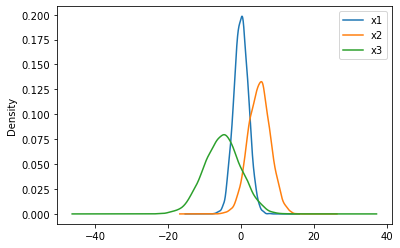

In [52]:
df.plot.kde()  # kernel density estimate

<AxesSubplot:ylabel='Density'>

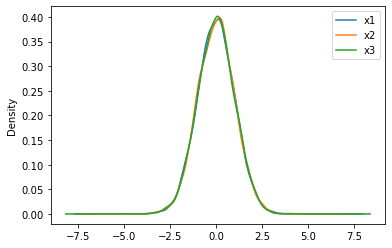

In [53]:
# Standard scailing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
data_tf = ss.fit_transform(df)     # returns an array
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()

<AxesSubplot:ylabel='Density'>

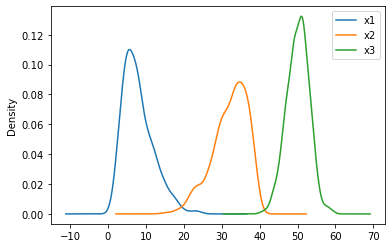

In [54]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000), # 카이제곱분포
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40, # 베타분포
    # no skew
    'x3': np.random.normal(50, 3, 1000) # 정규분포
})

df.plot.kde()

<AxesSubplot:ylabel='Density'>

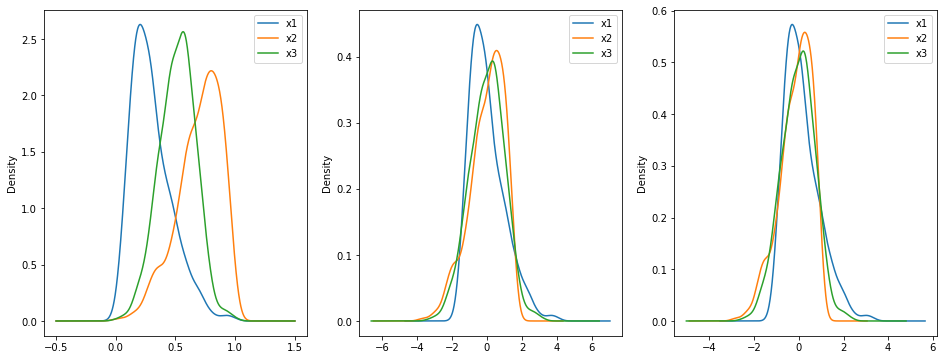

In [55]:
mm = MinMaxScaler()
data_tf = mm.fit_transform(df)
df1 = pd.DataFrame(data_tf,columns=['x1','x2','x3'])

sc = StandardScaler()
data_tf = sc.fit_transform(df)
df2 = pd.DataFrame(data_tf,columns=['x1','x2','x3'])

rb = RobustScaler()
data_tf = rb.fit_transform(df)
df3 = pd.DataFrame(data_tf,columns=['x1','x2','x3'])

fig, axes = plt.subplots(1, 3, figsize=(16,6))
df1.plot.kde(ax=axes[0]) # MinMax
df2.plot.kde(ax=axes[1]) # Standard
df3.plot.kde(ax=axes[2]) # Robust (median, IQR)

<AxesSubplot:ylabel='Density'>

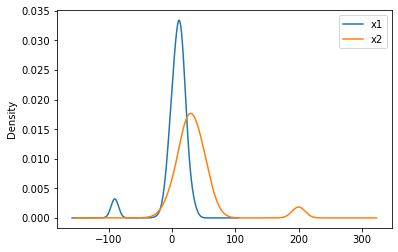

In [56]:
# 아웃라이어 존재하는 데이터

df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(10, 10, 1000), np.random.normal(-90, 1, 50)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 20, 1000), np.random.normal(200, 2, 50)]),
})
df.plot.kde()

<AxesSubplot:ylabel='Density'>

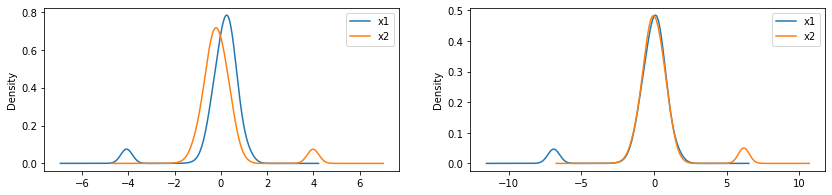

In [58]:
sc = StandardScaler()
data_tf = sc.fit_transform(df)
df1 = pd.DataFrame(data_tf,columns=['x1','x2'])

rb = RobustScaler()
data_tf = rb.fit_transform(df)
df2 = pd.DataFrame(data_tf,columns=['x1','x2'])

fig, axes = plt.subplots(1, 2, figsize=(14,3))
df1.plot.kde(ax=axes[0])
df2.plot.kde(ax=axes[1])

# Outlier들이 존재할 때, RobustScaler가 Scaling 효과가 매우 좋음!!

## For your reference

<AxesSubplot:>

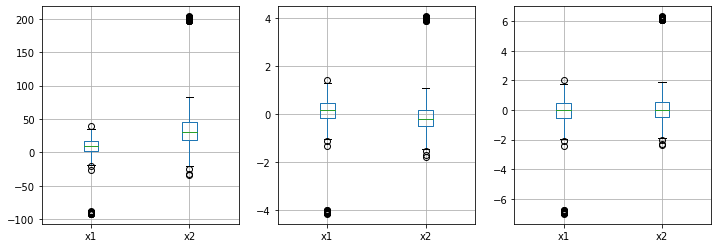

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
df.boxplot(ax=axes[0])
df1.boxplot(ax=axes[1])
df2.boxplot(ax=axes[2])

<AxesSubplot:>

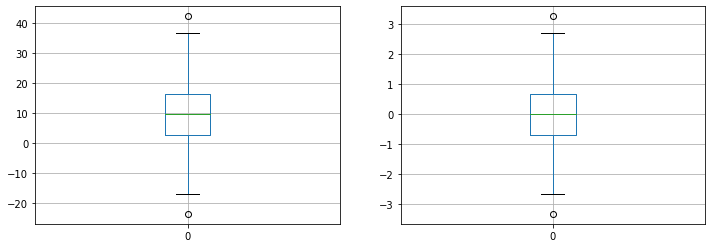

In [60]:
df = pd.DataFrame(np.random.normal(10, 10, 1000))
sc = StandardScaler()
data_tf = sc.fit_transform(df)
df1 = pd.DataFrame(data_tf)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
df.boxplot(ax=axes[0])
df1.boxplot(ax=axes[1])